In [1]:
import Pkg; Pkg.add("StatsBase")
import Pkg; Pkg.add("NamedArrays")
import Pkg; Pkg.add("PrettyTables")
import Pkg; Pkg.add("Shuffle")
import Pkg; Pkg.add("Zygote")
#import Pkg; Pkg.add("Plots.PlotMeasures")
import Pkg; Pkg.add("Metrics")
import Pkg; Pkg.add("ScikitLearn")
using DataFrames
using RDatasets
using Statistics
using StatsPlots
using CSV
using StatsBase
using NamedArrays
using PrettyTables
#using DecisionTree
using Shuffle
using Plots.PlotMeasures
using Zygote
using ScikitLearn.GridSearch: GridSearchCV
using ScikitLearn
using Metrics

include(joinpath(dirname(pwd()), "plottraintest.jl"))

fsize = 7
ftsize = 7

    Updating registry at `C:\Users\user\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...

  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...

  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...

  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...

  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`


7

In [2]:
df = CSV.read(joinpath(dirname(pwd()), "Concrete_Data.csv"), DataFrame)

,Cement (kg/m3),Blast Furnace Slag (kg/m3),Fly Ash (kg/m3),Water (kg/m3),Superplasticizer (kg/m3)
,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5
2,540.0,0.0,0.0,162.0,2.5
3,332.5,142.5,0.0,228.0,0.0
4,332.5,142.5,0.0,228.0,0.0
5,198.6,132.4,0.0,192.0,0.0
6,266.0,114.0,0.0,228.0,0.0
7,380.0,95.0,0.0,228.0,0.0
8,380.0,95.0,0.0,228.0,0.0
9,266.0,114.0,0.0,228.0,0.0


In [7]:
dfm = Matrix(df)
dfms = dfm[shuffle(1:end), :]
# dfms = dfm

x = dfms[:, 1:8]
y = dfms[:, 9]

data_split = [0.6, 0.3, 0.1]
split_cs2 = Int.(round.(cumsum(data_split)*length(y)))
split_cs1 = vcat(1, split_cs2[1:(end-1)].+1)

xtrain = x[split_cs1[1]:split_cs2[1], :]
ytrain = y[split_cs1[1]:split_cs2[1]]

xtest = x[split_cs1[2]:split_cs2[2], :]
ytest = y[split_cs1[2]:split_cs2[2]]

xval = x[split_cs1[3]:split_cs2[3], :]
yval = y[split_cs1[3]:split_cs2[3]];

In [8]:
xnorm = (dfms[:, 1:8] .- mean(x,dims=1))./std(x,dims=1)
xtrainnorm = xnorm[split_cs1[1]:split_cs2[1], :]

xtestnorm = xnorm[split_cs1[2]:split_cs2[2], :]

xvalnorm = xnorm[split_cs1[3]:split_cs2[3], :];

In [9]:
function mse(ŷ::Vector{T}, y::Vector{T})::T where T<:AbstractFloat
	sum((ŷ-y).^2/length(ŷ))
end
function minimize!(f_model::Function, x::Matrix{T}, y::Vector{T}, p::Vector{T}, η::T, num_steps::Int)::Vector{T} where T<:AbstractFloat
	for step in 1:num_steps
		g(p) = mse(f_model(x, p), y)
		p .-= η.* g'(p)
	end
	p
end
function model(x::Matrix{T}, p::Vector{T})::Vector{T} where T<:AbstractFloat
	sum(x.*p[1:(length(p)-1)]', dims=2)[:] .+ p[length(p)]
end

model (generic function with 1 method)

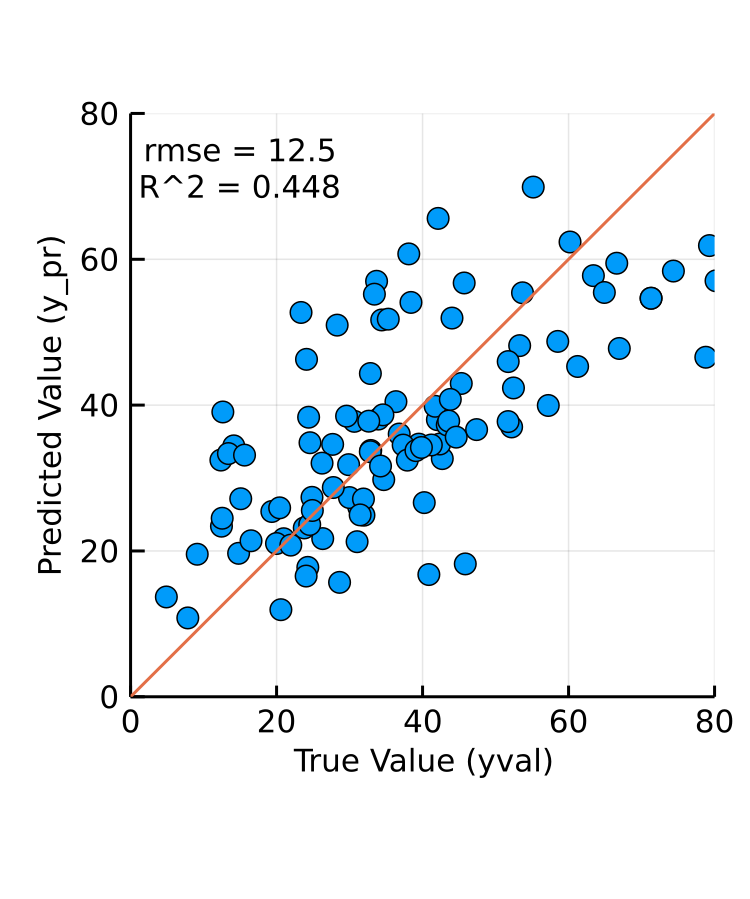

In [17]:
# apply learned model
pp = minimize!(model, xtrain, ytrain, rand(size(x, 2)+1), 0.00000001, 10000000)  #0.000000001, 100000000
y_pr_val = model(xval, pp)



display(plotval(yval,y_pr_val))
savefig(joinpath(dirname(@__FILE__), "LRval.png"))

In [6]:
#pp = minimize!(model, xtrain, ytrain, rand(size(x, 2)+1), 0.000000001, 1000000)  #0.000000001, 100000000
#y_pr_train = model(xtrain, pp)
#y_pr_test = model(xtest, pp)

#display(plottraintest(ytrain, y_pr_train, ytest, y_pr_test))


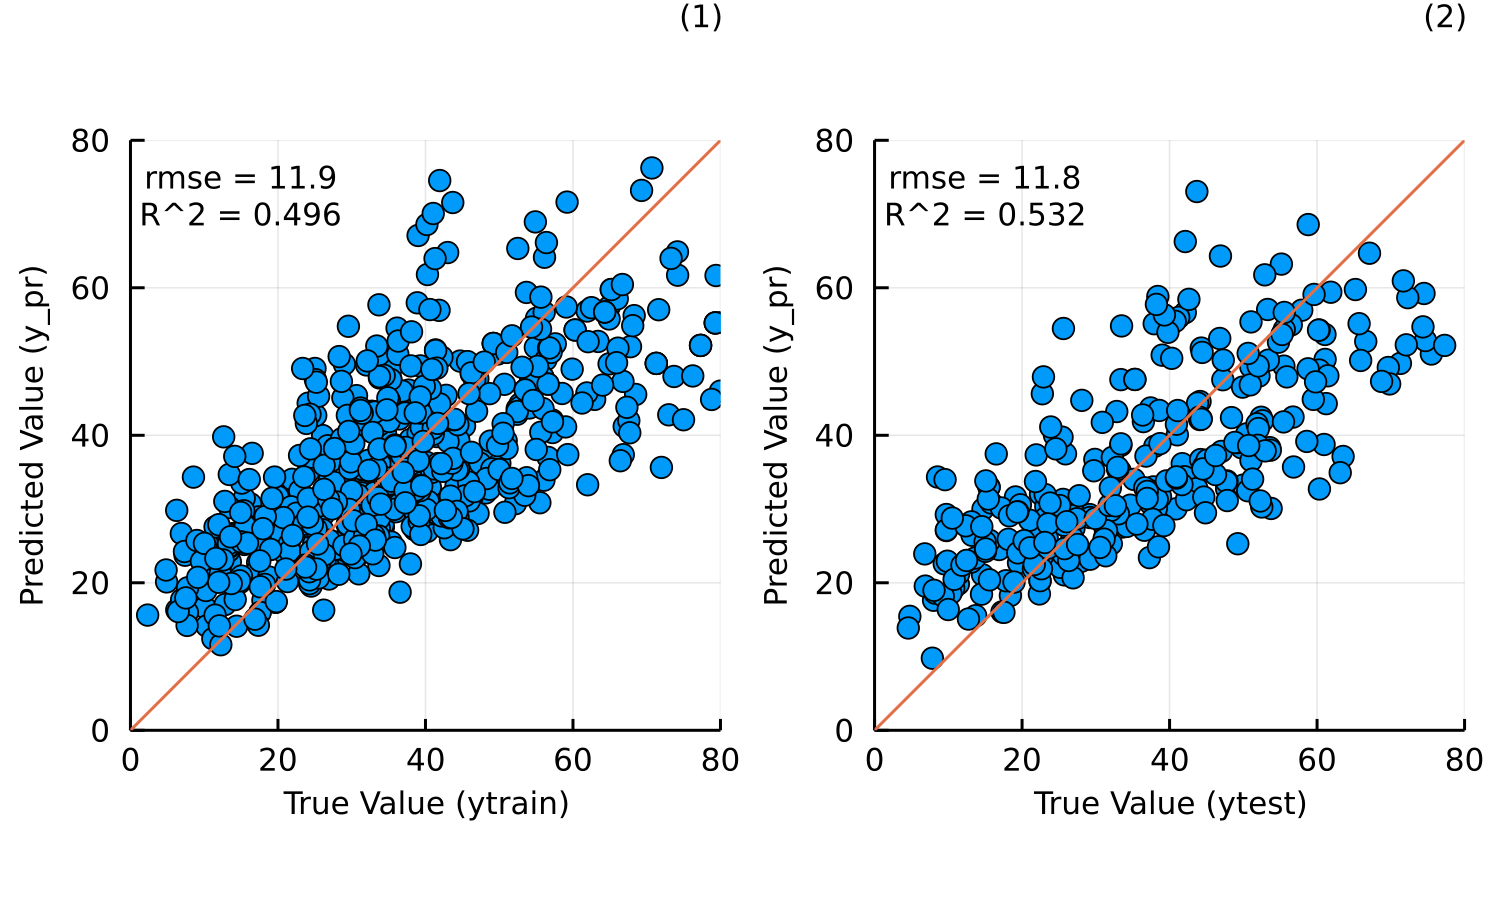

In [ ]:
#display(plottraintest(ytrain, y_pr_train, ytest, y_pr_test))
#savefig(joinpath(dirname(@__FILE__), "Regression1.png")) # uncomment to save figure
# CSV.write("Regression.csv", DataFrame(p=pp), header=false) # uncomment to save p to csv

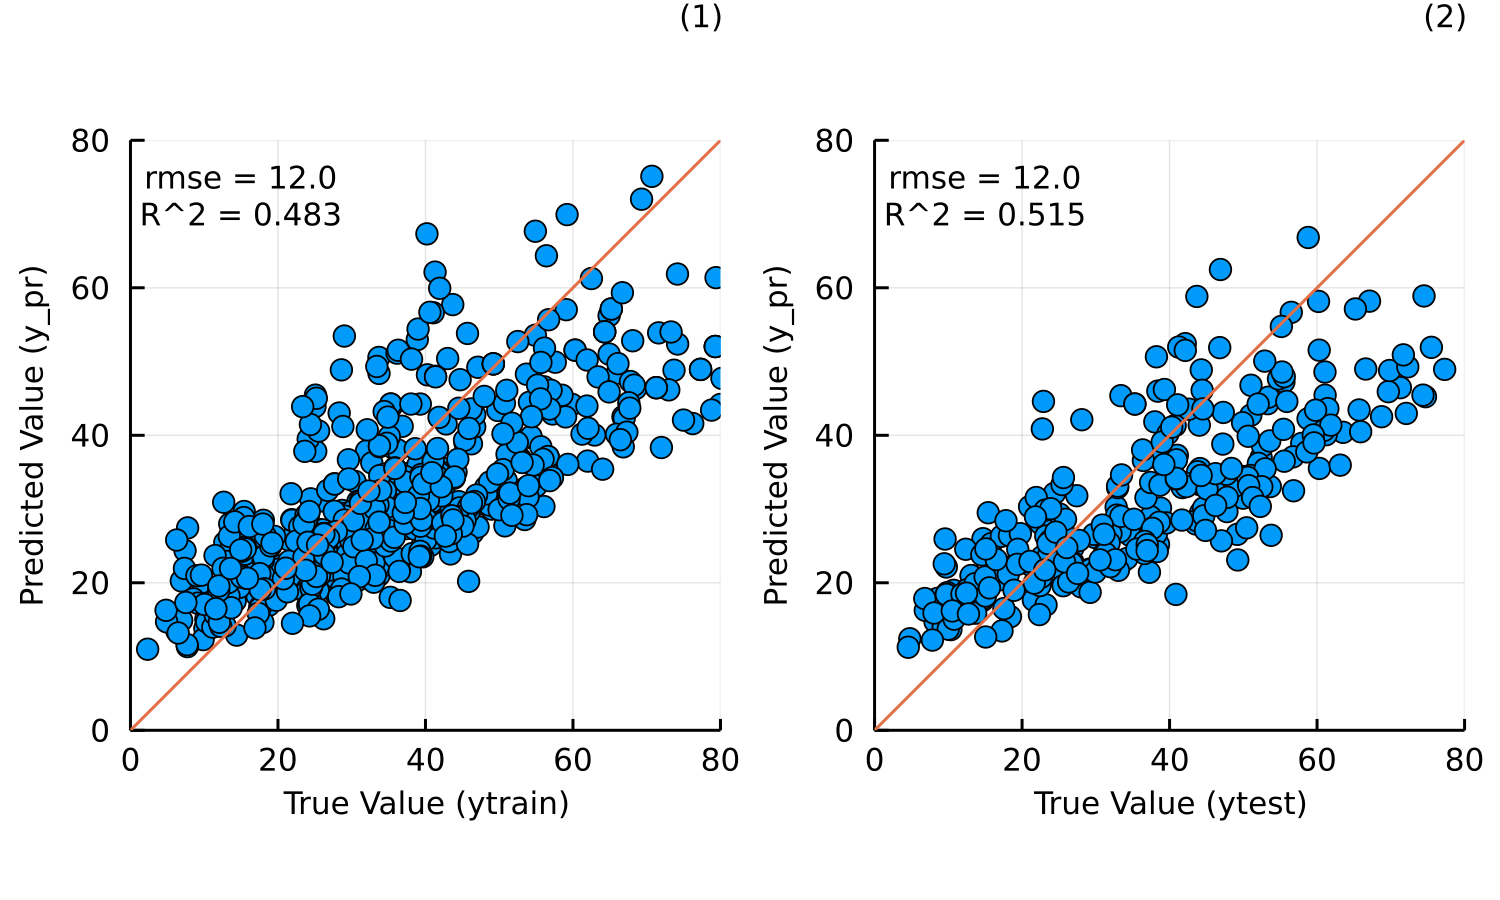

In [ ]:
#p_norm = minimize!(model, xtrainnorm, ytrain, rand(size(x, 2)+1), 0.0001, 10000)
#y_pr_trainnorm = model(xtrainnorm, p_norm)
#y_pr_testnorm = model(xtestnorm, p_norm)

#display(plottraintest(ytrain, y_pr_trainnorm, ytest, y_pr_testnorm))

In [ ]:
#dfp = CSV.read(joinpath(dirname(@__FILE__), "Regression.csv"), DataFrame)
#ppp = Matrix(dfp)[:]

#y_pr_train = model(xtrain, ppp)
#y_pr_test = model(xtest, ppp)

#display(plottraintest(ytrain, y_pr_train, ytest, y_pr_test))

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 8 and 7